In [29]:
# Import all of the python packages used in this workflow.
import scipy
import numpy as np
from collections import OrderedDict
import os, sys
from pylab import *
import pandas as pd
import numpy as np
import osr
import xarray as xr
import geopandas as gpd
from datetime import datetime
from datetime import timedelta  
import json
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
from matplotlib.colors import ListedColormap
import seaborn as sns

In [40]:
gdf = gpd.read_file('../CSO_SNOTEL_sites.geojson')
df = pd.read_csv('../CSO_SNOTEL_data_SWEDmeters.csv',index_col=0) 
df_depth = pd.read_csv('../CSO_SNOTEL_data_SNODmeters.csv',index_col=0) 
gdf.head()

,code,longitude,latitude,name,elevation_m,easting,northing,geometry
0,314_WY_SNTL,-110.445442,43.940189,Base Camp,2151.887939453125,544505.845453,4.865379e+06,POINT (-110.44544 43.94019)
1,347_MT_SNTL,-111.128029,44.508320,Black Bear,2490.216064453125,489823.440274,4.928341e+06,POINT (-111.12803 44.50832)
2,350_WY_SNTL,-109.793327,44.376671,Blackwater,2980.944091796875,596129.923439,4.914418e+06,POINT (-109.79333 44.37667)
3,353_WY_SNTL,-110.609734,42.964001,Blind Bull Sum,2636.52001953125,531828.554679,4.756891e+06,POINT (-110.60973 42.96400)
4,379_WY_SNTL,-109.670212,43.697330,Burroughs Creek,2667,607155.527746,4.839116e+06,POINT (-109.67021 43.69733)


In [41]:
df_depth.head()

,314_WY_SNTL,347_MT_SNTL,350_WY_SNTL,353_WY_SNTL,379_WY_SNTL,419_WY_SNTL,460_WY_SNTL,468_WY_SNTL,1082_WY_SNTL,497_WY_SNTL,...,764_WY_SNTL,765_WY_SNTL,779_WY_SNTL,806_WY_SNTL,807_WY_SNTL,816_WY_SNTL,822_WY_SNTL,831_WY_SNTL,837_WY_SNTL,868_WY_SNTL
2014-10-01,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,NaN,0.0508,0.0,...,0.0,0.0,0.0,0.0254,0.0,0.0,0.0,0.0,0.0762,0.0
2014-10-02,0.0,0.0,0.0508,0.0,0.0,0.0,0.0,NaN,0.1016,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0762,0.0
2014-10-03,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,NaN,0.1270,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0508,0.0
2014-10-04,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,NaN,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0
2014-10-05,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,NaN,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0


In [47]:
x = df['314_WY_SNTL'].values.reshape(5,365)
#new = np.reshape(x, (365,(int(len(x)/365))))
print(shape(x))
av = np.mean(x,0)
shape(av)

(5, 365)


(365,)

In [52]:
import cycler

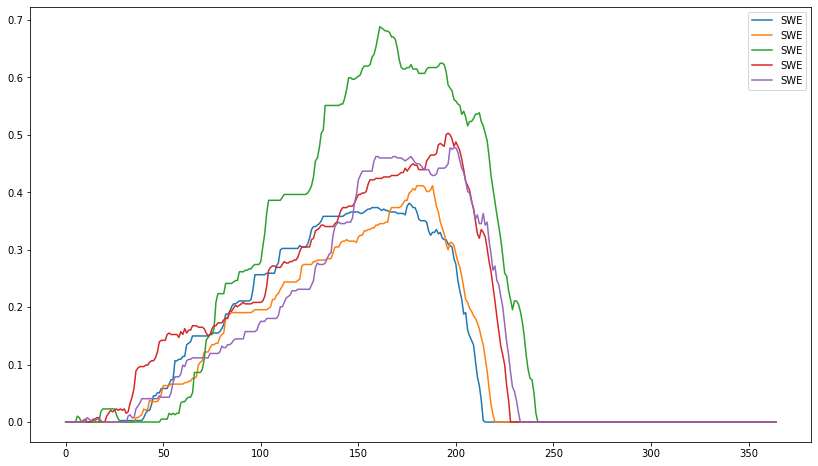

In [51]:
fig, axs = plt.subplots(figsize=(14, 8))
axs.plot(np.transpose(x),label = 'SWE')
axs.legend()

In [ ]:
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    x = df[nam].values.reshape(5,365)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6)
fig.subplots_adjust(hspace=0.5)
#fig.suptitle('Distributions of Iris Features')
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    x = df[nam].values.reshape(5,365)
    for ax, feature, name in zip(axes.flatten(), data.data.T, data.feature_names):
        ax.plot(np.transpose(x))
        #ax.set(title=name[:-4].upper(), xlabel='cm')

In [ ]:
x = df[nam].values.reshape(5,365)
    inputs = np.transpose(x)

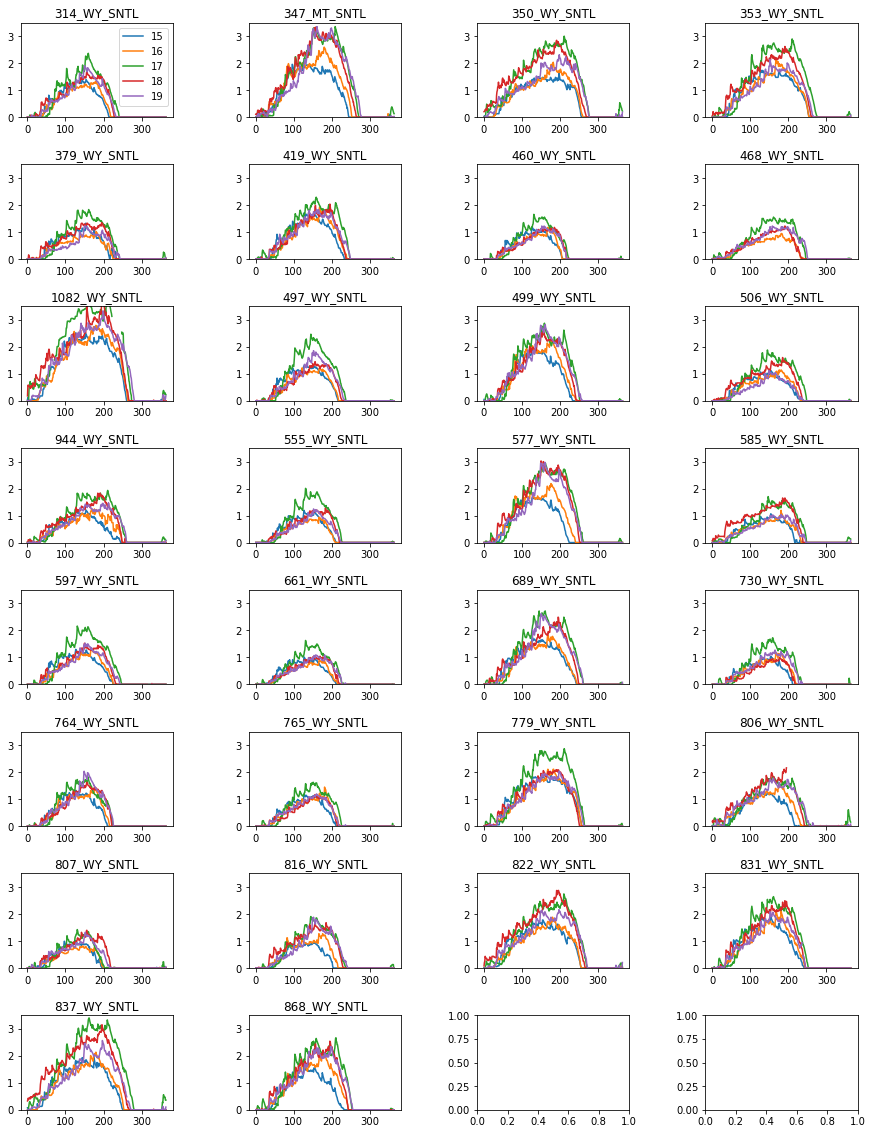

In [44]:
station = gdf['code'].values
labels = ['15', '16', '17','18','19']

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()
# 1, 2, 3, 4, 5, 
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    x = df_depth[nam].values.reshape(5,365)
    axs[i].plot(np.transpose(x),label=labels)
    axs[i].set_title(nam)
    axs[i].set_ylim([0, 3.5])
    if i == 0:
        axs[i].legend(['15', '16', '17','18','19'])

In [45]:
fig.savefig('WY_domain_DEPTH.pdf', format='pdf', dpi=300)

# Density

/nfs/stak/users/aragonch/miniconda/envs/snowmodelcal/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/nfs/stak/users/aragonch/miniconda/envs/snowmodelcal/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/nfs/stak/users/aragonch/miniconda/envs/snowmodelcal/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/nfs/stak/users/aragonch/miniconda/envs/snowmodelcal/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/nfs/stak/users/aragonch/miniconda/envs/snowmodelcal/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/nfs/stak/users/aragonch/miniconda/envs/snowmodelcal/lib/python3.6/site-packages/ipykern

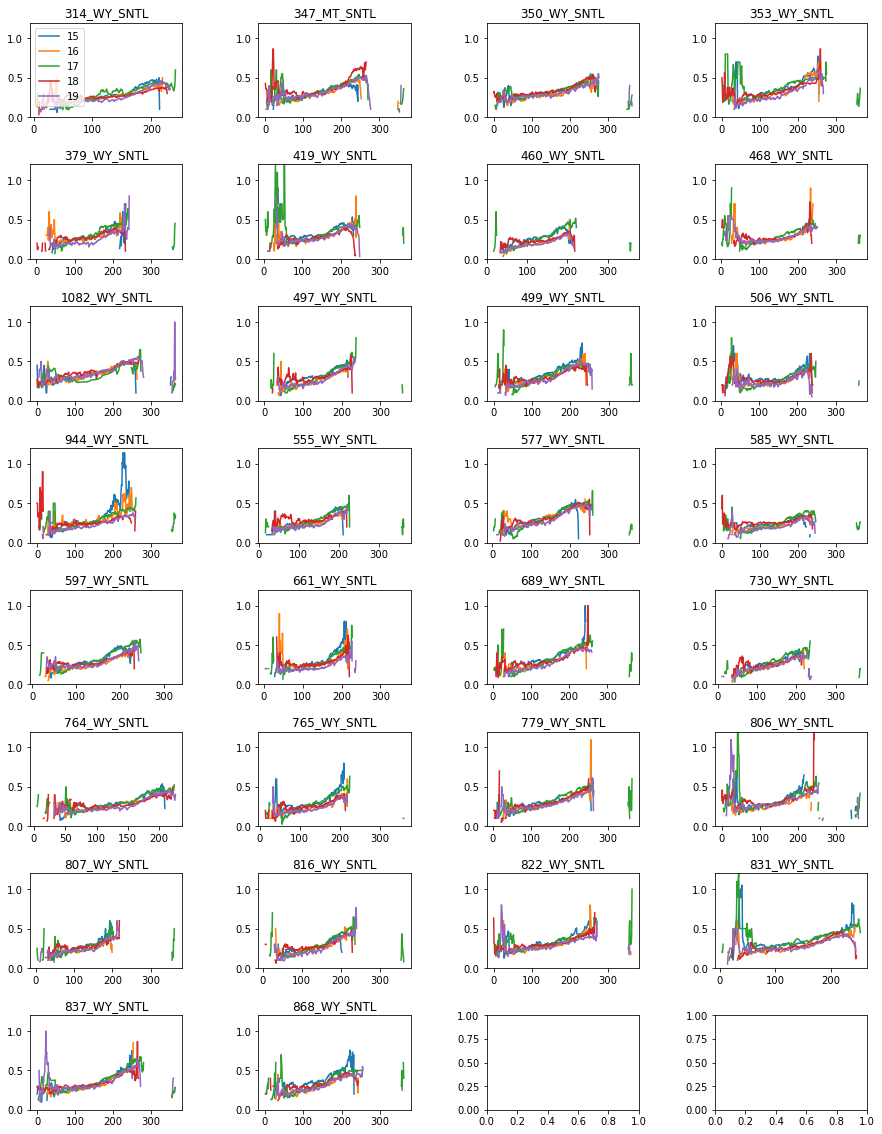

In [52]:
station = gdf['code'].values
labels = ['15', '16', '17','18','19']

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()
# 1, 2, 3, 4, 5, 
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    depth = df_depth[nam].values.reshape(5,365)
    swe = df[nam].values.reshape(5,365)
    density = swe/depth
    axs[i].plot(np.transpose(density),label=labels)
    axs[i].set_title(nam)
    axs[i].set_ylim([0,1.2])
    if i == 0:
        axs[i].legend(['15', '16', '17','18','19'])

In [53]:
fig.savefig('WY_domain_RHO.pdf', format='pdf', dpi=300)

# Station plot

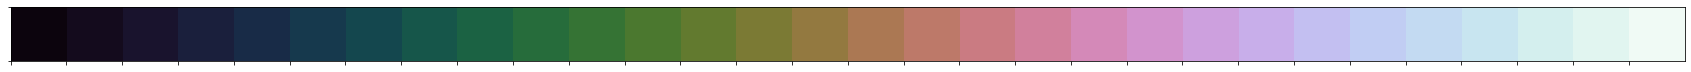

In [5]:
from matplotlib.colors import ListedColormap
import seaborn as sns
cmap = ListedColormap(sns.color_palette("Spectral",200))  
clrs = sns.palplot(sns.color_palette("cubehelix",30))

#cmap = sns.cubehelix_palette(30,as_cmap=True)


pal = sns.dark_palette("palegreen", as_cmap=True)

cmap = ListedColormap(sns.color_palette("Spectral",200))   

In [23]:
import rasterio
import rasterio.plot

raster = '/nfs/attic/dfh/Aragon2/DEM_WY_new.tif'

ds = rio.open(lidar_dem_path)
#dem = ds.read(1)
ds.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 5871,
 'height': 7556,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0002964196053816931, 0.0, -111.16126611283474,
        0.0, -0.0002964196053816931, 44.59264425139892)}

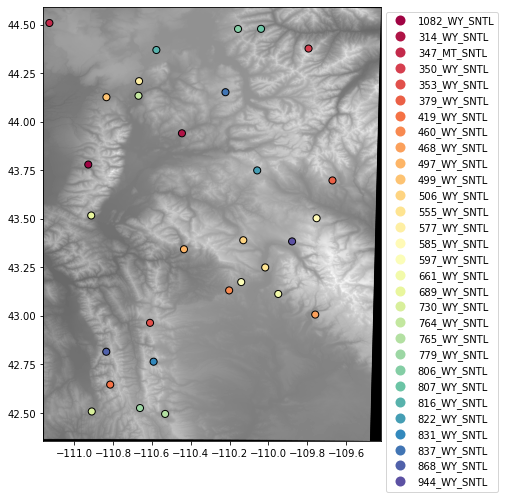

In [30]:
colors = ListedColormap(sns.color_palette("Spectral",200)) 

fig,ax = plt.subplots(figsize=(10,8))

rasterio.plot.show(ds, ax=ax,cmap='gray')
gdf.plot(column='code',legend=True, ax=ax,markersize=50,edgecolors='k',cmap=colors)


leg = ax.get_legend()
leg.set_bbox_to_anchor((1,1))

/nfs/stak/users/aragonch/miniconda/envs/snowmodelcal/lib/python3.6/site-packages/geopandas/plotting.py:509: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


-110.44544219970703 43.940189361572266 314_WY_SNTL
-111.1280288696289 44.50831985473633 347_MT_SNTL
-109.79332733154297 44.376670837402344 350_WY_SNTL
-110.60973358154297 42.9640007019043 353_WY_SNTL
-109.67021179199219 43.697330474853516 379_WY_SNTL
-110.8148193359375 42.64590072631836 419_WY_SNTL
-110.20230102539062 43.1309700012207 460_WY_SNTL
-109.75892639160156 43.006568908691406 468_WY_SNTL
-110.9278335571289 43.77933120727539 1082_WY_SNTL
-110.43495178222656 43.342979431152344 497_WY_SNTL
-110.8343505859375 44.126121520996094 499_WY_SNTL
-110.12943267822266 43.38938903808594 506_WY_SNTL
-109.8781509399414 43.38331985473633 944_WY_SNTL
-110.01661682128906 43.249298095703125 555_WY_SNTL
-110.6662826538086 44.2086181640625 577_WY_SNTL
-109.75199890136719 43.50278091430664 585_WY_SNTL
-110.14006805419922 43.17387008666992 597_WY_SNTL
-109.94947052001953 43.11265182495117 661_WY_SNTL
-110.91258239746094 43.516868591308594 689_WY_SNTL
-110.90989685058594 42.50749969482422 730_WY_SNTL


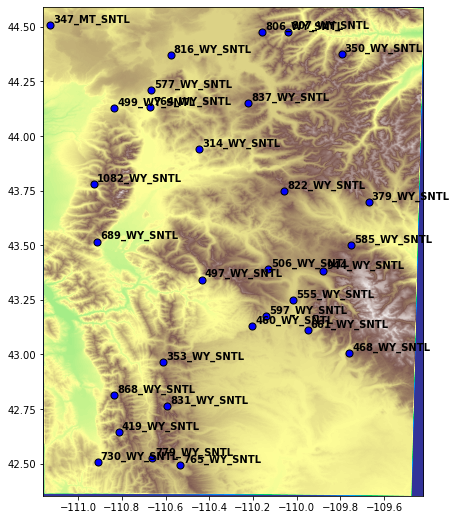

In [61]:
fig,ax = plt.subplots(figsize=(12,9))

rasterio.plot.show(ds, ax=ax,cmap='terrain')
gdf.plot(column='code',color='b',legend=False, ax=ax,markersize=50,edgecolors='k')


for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.code):
    print(x,y,label)
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",weight='bold',fontsize=10)

In [38]:
fig.savefig('Station_map.png', dpi = 300, bbox_inches='tight')

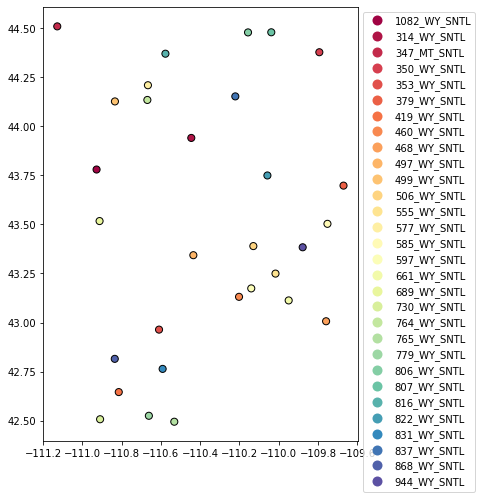

In [16]:

#plot DEM and overlapping ATL06 lines

fig,ax = plt.subplots(figsize=(10,8))

from_proj =ccrs.PlateCarree()
to_proj = ds.crs
ax = plt.axes(projection=to_proj)

im = ax.imshow(dem,cmap='inferno')
gdf.plot(column='code',legend=True, ax=ax,markersize=50,edgecolors='k',cmap=cmap)

#ATL06_gdf_list[1].plot(ax=ax)
#for gdf in ATL06_gdf_list:
#    gdf.plot(ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1,1))

#get depth data to calculate density
